<a href="https://colab.research.google.com/github/pulkitrajput147/ML-projects/blob/master/Project_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting whether the Patient has 10-years risk of future Coronary Heart Disease(CHD)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
df=pd.read_csv('./framingham.csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Data Cleaning**

In [ ]:
df=df.drop('education',axis=1)

In [ ]:
# removing null oe NAN values from the Dataset
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(3751, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


In [ ]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Removing outliers using Z-score
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[1.11629198 1.23390951 0.97706903 ... 0.35934732 0.20436458 0.4241825 ]
 [0.89582297 0.4170173  0.97706903 ... 1.61407468 0.24624229 0.4241825 ]
 [1.11629198 0.18361952 1.02346914 ... 0.05889514 0.49750858 0.4241825 ]
 ...
 [0.89582297 0.28317603 0.97706903 ... 0.35934732 1.05196682 0.4241825 ]
 [1.11629198 1.11721063 0.97706903 ... 0.72808307 0.41375315 0.4241825 ]
 [0.89582297 1.23390951 1.02346914 ... 0.77758977 0.07873144 0.4241825 ]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([  13,   25,   32,   34,   34,   34,   40,   40,   40,   40,   50,
         60,   60,   70,   79,   79,   88,   99,  130,  140,  144,  144,
        147,  151,  179,  227,  227,  227,  227,  232,  232,  237,  240,
        257,  270,  279,  293,  298,  298,  303,  308,  318,  319,  330,
        335,  367,  367,  378,  392,  392,  395,  395,  396,  399,  404,
        416,  416,  420,  426,  426,  426,  471,  480,  482,  519,  524,
        524,  549,  577,  591,  594,  595,  624,  644,  646,  661,  673,
        673,  683,  683,  683,  701,  710,  742,  742,  742,  742,  772,
        772,  772,  795,  799,  807,  807,  825,  833,  849,  849,  862,
        866,  872,  895,  900,  913,  920,  931,  942,  954,  954,  964,
        965,  965,  993,  994,  994, 1002, 1028, 1041, 1055, 1061, 1061,
       1068, 1104, 1104, 1127, 1133, 1133, 1149, 1163, 1191, 1197, 1214,
       1216, 1216, 1240, 1293, 1296, 1300, 1307, 1312, 1321, 1328, 1328,
       1331, 1360, 1360, 1363, 1380, 1386, 1389, 1

In [ ]:
df = df[(z < 3).all(axis=1)]

In [ ]:
df.shape

(3398, 15)

In [ ]:
# checking wheteher the dataset is balanced or not
true_count=len(df.loc[df['TenYearCHD']==True])
false_count=len(df.loc[df['TenYearCHD']==False])
(true_count,false_count)

(459, 2939)

In [ ]:
sns.pairplot(df,hue='TenYearCHD')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5343d71c80> (for post_execute):


KeyboardInterrupt: ignored

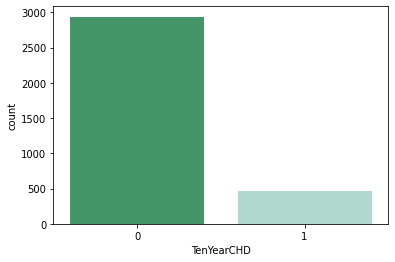

In [ ]:
sns.countplot(x ='TenYearCHD', data =df,  
             palette ="BuGn_r" ) 
plt.show() 

In [ ]:
X=df.drop('TenYearCHD',axis=1)
Y=df['TenYearCHD']

In [ ]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=45)

In [ ]:
X_train.shape

(2378, 14)

In [ ]:
X_test.shape

(1020, 14)

In [ ]:
# Applying algorithm
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(Y_test,Y_pred)

0.8784313725490196

In [ ]:
# checking how much the  model is overfitted or underfitted
# Cross validaton of the ML Model
from sklearn.model_selection import  cross_val_score
cross_validation=cross_val_score(estimator=model,X=X_train,y=Y_train,cv=2)
print("cross validation mean accuracy of the  model  is = ",cross_validation.mean())

cross validation mean accuracy of the  model  is =  0.855340622371741


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print (classification_report(Y_test, Y_pred)) 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       897
           1       0.43      0.02      0.05       123

    accuracy                           0.88      1020
   macro avg       0.66      0.51      0.49      1020
weighted avg       0.83      0.88      0.83      1020



In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[893,   4],
       [120,   3]])

In [ ]:
# saving the model using pickle
import pickle
pickle.dump(model,open('heart_disease_prediction.pickle','wb'))